# TODO

- Background Study

- EDA

- Develop Models

- Evaluate Models

- Develop web based front end

- Finalize latex report

## EDA Checklist:

- ReadData

- Dataset Description

- Pairplot

- outlier


1. What question(s) are you trying to solve (or prove wrong)?
2. What kind of data do you have and how do you treat different types?
3. What’s missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184

# Dataset Description

**id** : Unique identifier for each data entry\
**name** : Name of the Pokémon\
**rank** : Rank or evolutionary stage\
**generation** : The generation in which the Pokémon was introduced\
**evolves_from** : Name of the Pokémon from which it evolves (if applicable)\
**type1** : Primary type of the Pokémon\
**type2** : Secondary type of the Pokémon (if it has one)\
**hp** : Base HP (Hit Points)\
**atk** : Base Attack stat\
**def** : Base Defense stat\
**spatk** : Base Special Attack stat\
**spdef** : Base Special Defense stat\
**speed** : Base Speed stat\
**total** : Total base stats\
**height** : Height of the Pokémon\
**weight** : Weight of the Pokémon\
**abilities** : List of the Pokémon's abilities\
**desc** : Description or characteristics of the Pokémon


In [126]:
! pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.2.2 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [127]:
import pandas as pd
import numpy as np                     # For mathematical calculations 
import seaborn as sns                  # For data visualization 
import matplotlib.pyplot as plt        # For plotting graphs 
import random

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix


In [128]:
# Read the CSV file
df = pd.read_csv("./pokemons.csv")
pokemon_data = df.copy().drop(columns=['name', 'evolves_from', 'generation','type1', 'type2', 'abilities', 'desc'])
pokemon_data
pokemon_data = pd.DataFrame(pokemon_data)

### Data Cleaning

In [129]:
## replace all mythical pokemon rank with lengendary rank

pokemon_data = pokemon_data.replace("mythical", "legendary")
pokemon_data = pokemon_data.replace("baby", "ordinary")




In [130]:
## check if there are any mythical ranks left in the dataframe
## nothing should show up
for i in pokemon_data['rank']:
    if i == "mythical":
        print(i)

## Adding more data

In [131]:
big_pokemon_data = []


for i in range(len(pokemon_data)):
    # Create a copy of the original datapoint
    if pokemon_data.loc[i]['rank'] == 'legendary':
        k = 100
    else:
        k = 10
    for z in range(k):
        new_pokemon = pokemon_data.loc[i]

        # Get the randomly chosen datapoint
        tot = 127
        maxx = 63
        count = 0


        stats = [0,0,0,0,0,0]
        while count != 0:
            while(1):
                random_index = random.randint(2,7)
                if stats[random_index-2] != 63:                 #if stats are not maxed you can add                
                    break 
            new_stat_value = random.randint(1, max-stats[random_index-2]-count) #choose random int between 0-63 ()
            stats[random_index-2] += new_stat_value
            count -= new_stat_value
        count = 0
        while count != 0:
            while(1):
                random_index = random.randint(2,7)
                if stats[random_index-2] != 63:                 #if stats are not maxed you can add                
                    break 
            new_stat_value = random.randint(1, max-stats[random_index-2]-count) #choose random int between 0-63 ()
            stats[random_index-2] += new_stat_value
            count -= new_stat_value



        for j in range(6):
            new_pokemon[j+2] += stats[j]

            # Make alterations to the copy

            # Append the altered datapoint to the new dataset
        big_pokemon_data.append(new_pokemon) 


/usr/lib/python3/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained_assignment_possible()


In [132]:
big_pokemon_data = pd.DataFrame(big_pokemon_data)
#print(big_pokemon_data)


for j in big_pokemon_data['rank']:
    if j == "legendary":
        print(j)

legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary
legendary


## EDA

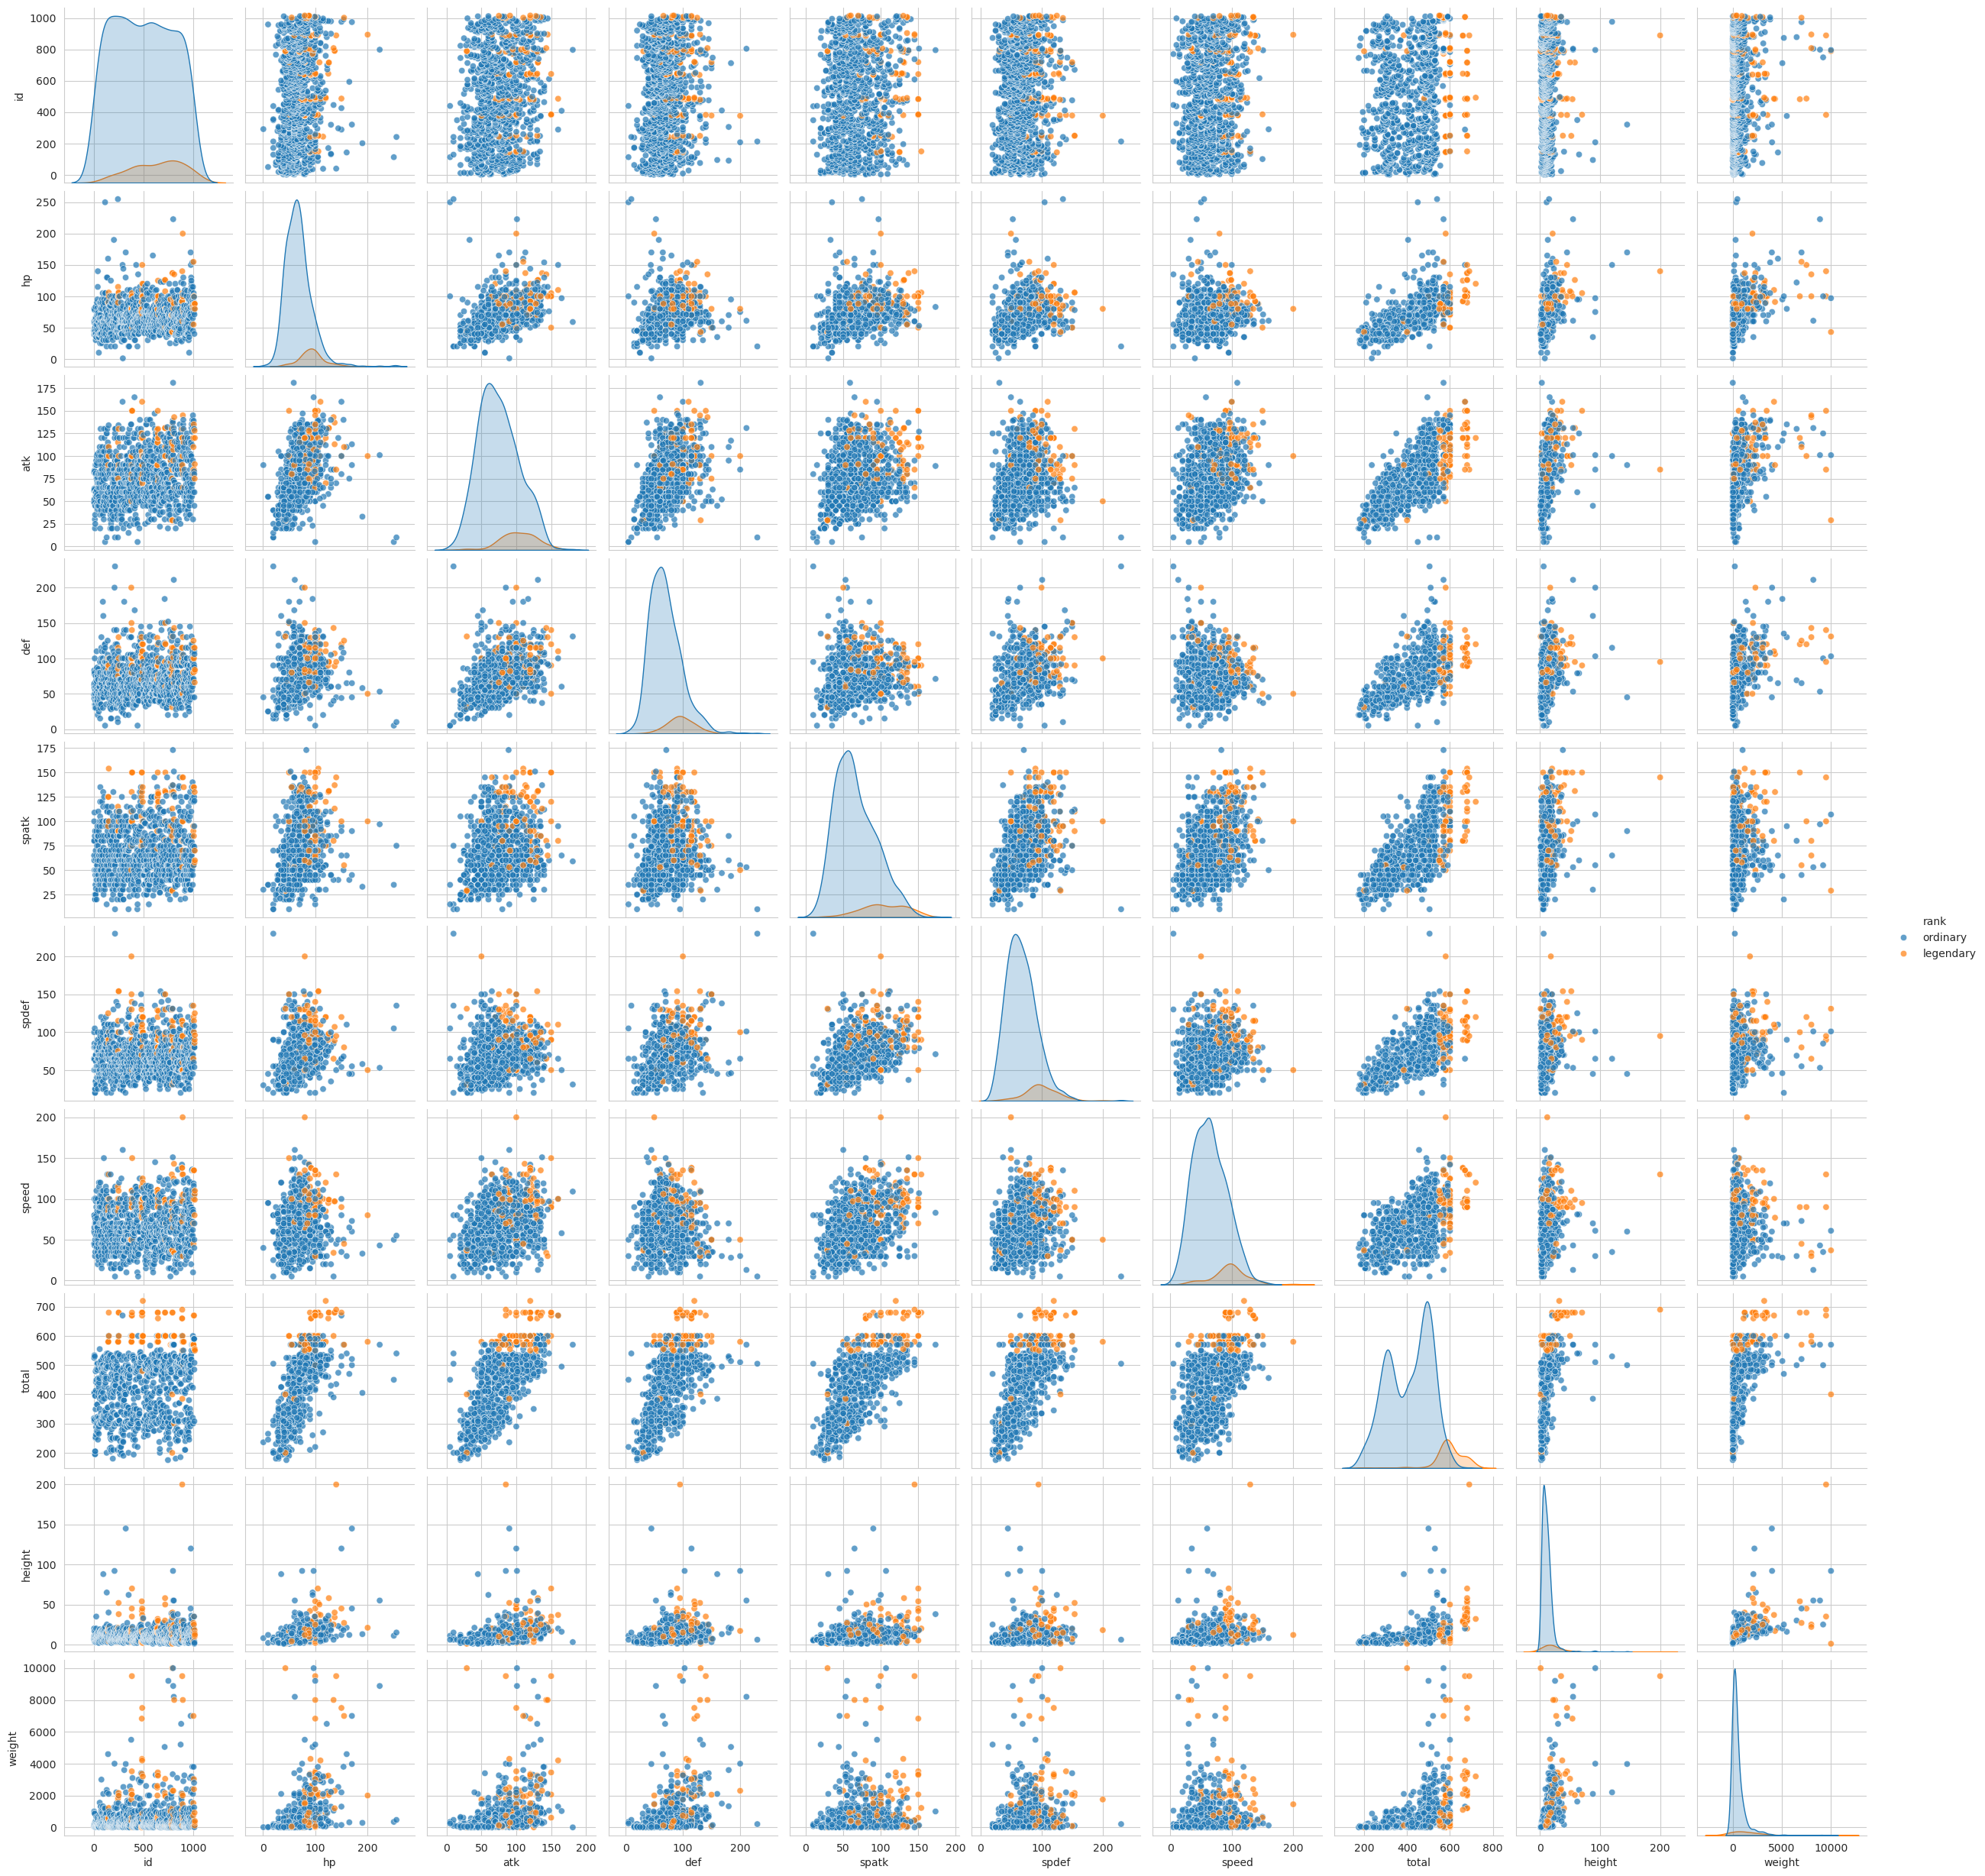

In [133]:
sns.pairplot(pokemon_data, hue='rank', diag_kind='kde', plot_kws={'alpha': 0.7})
plt.show()


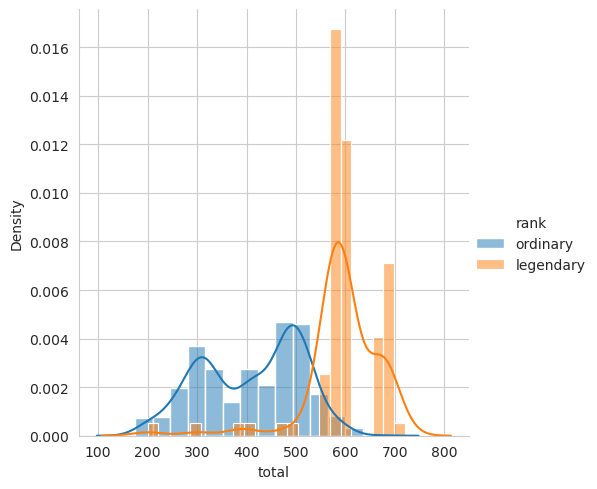

In [134]:
sns.set_style("whitegrid")
sns.FacetGrid(pokemon_data,hue="rank",height = 5) \
    .map(sns.histplot,"total", kde=True,stat = "density",kde_kws=dict(cut=3)) \
    .add_legend()
plt.show()

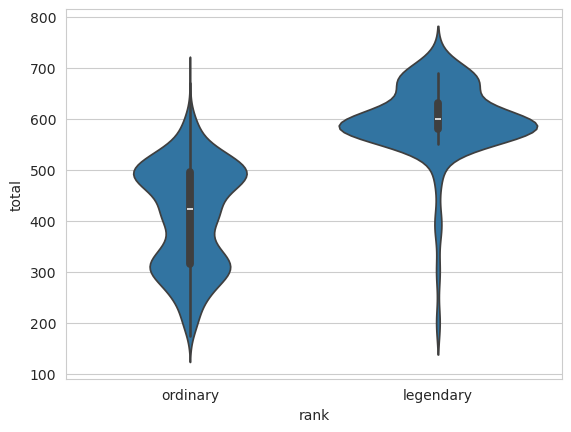

In [135]:
sns.violinplot(x='rank', y='total', data=pokemon_data)
plt.show()

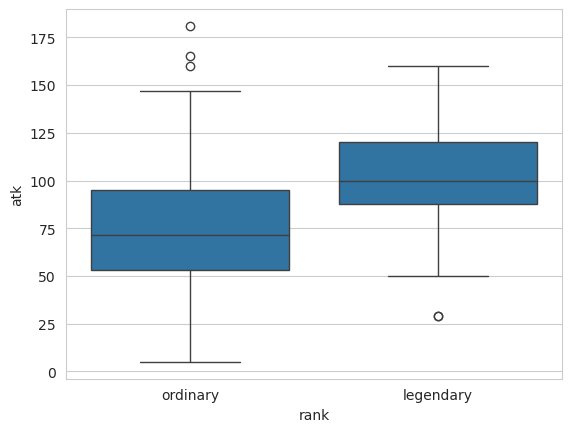

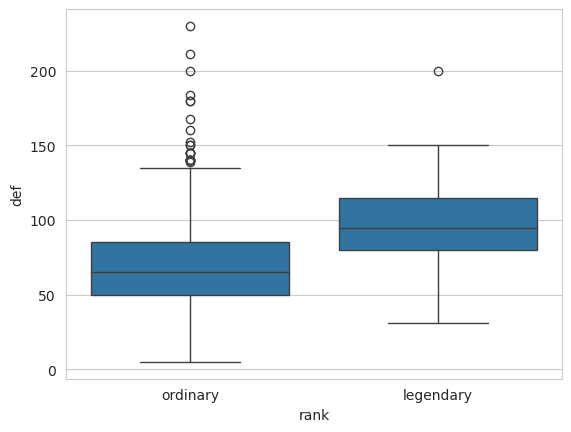

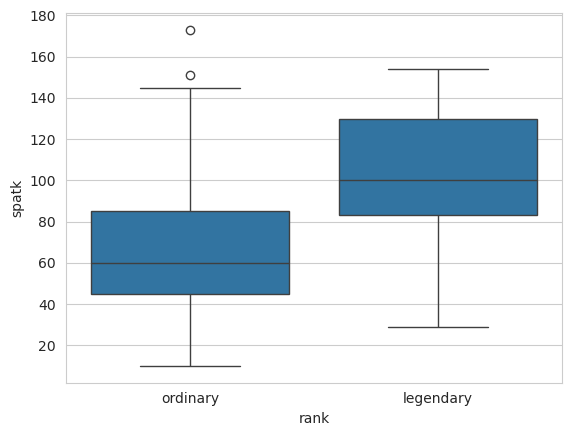

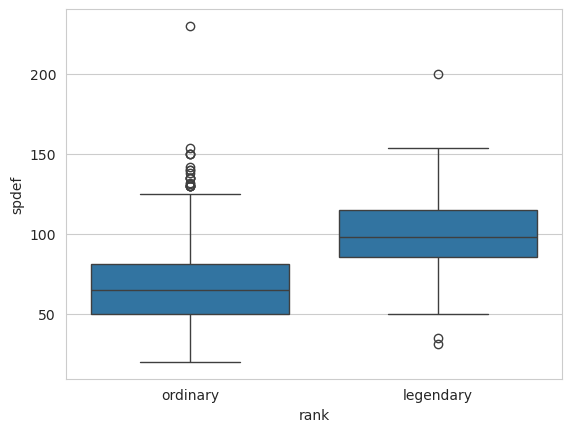

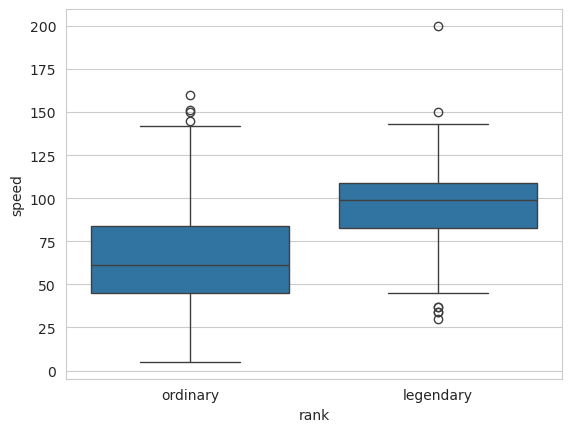

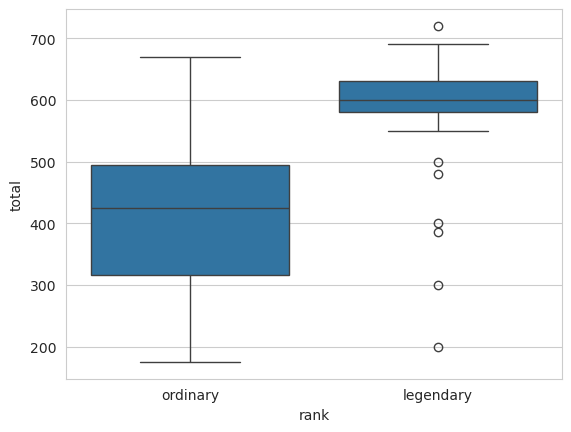

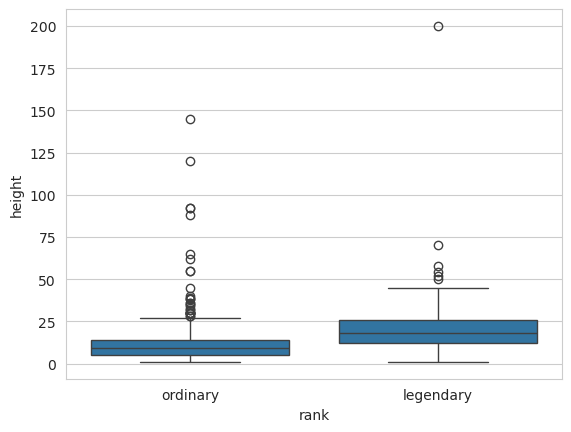

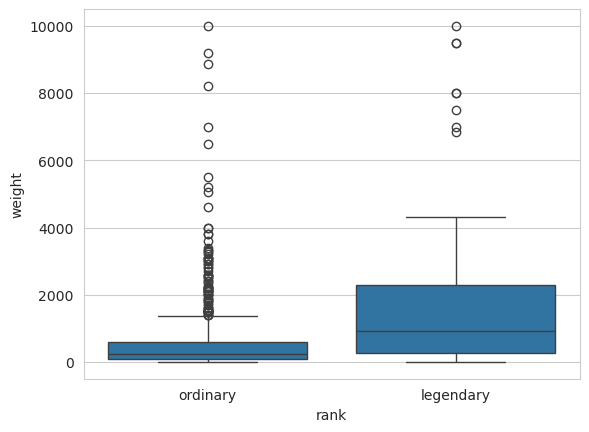

In [136]:
for col_names in pokemon_data.columns[3:]:
    sns.boxplot(x='rank',y=col_names, data=pokemon_data)
    plt.show()
    #print(col_names)

# Training the model

In [137]:

y = big_pokemon_data['rank']
# print(y)
set_of_classes = y.value_counts().index.tolist()
# print(set_of_classes)
set_of_classes= pd.DataFrame({'rank': set_of_classes})
y = pd.get_dummies(y) 
X = big_pokemon_data.drop('rank', axis = 1)

print(y)

scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data = X_rescaled, columns = X.columns)

train, test = train_test_split(big_pokemon_data, test_size=0.2, random_state=21) #splitting the data testsize = 0.2 for 80:20
X_train, y_train = train.drop(columns=['rank']), train['rank'] 
X_test, y_test = test.drop(columns=['rank']), test['rank'] 

print("Training set shape (X, y):", X_train.shape, y_train.shape)
print("Testing set shape (X, y):", X_test.shape, y_test.shape) #showing the 80:20 split




cls = LogisticRegression()
cls.fit(X_train, y_train)
print(classification_report(y_test, cls.predict(X_test)))

      legendary  ordinary
0             0         1
0             0         1
0             0         1
0             0         1
0             0         1
...         ...       ...
1016          1         0
1016          1         0
1016          1         0
1016          1         0
1016          1         0

[18360 rows x 2 columns]
Training set shape (X, y): (14688, 10) (14688,)
Testing set shape (X, y): (3672, 10) (3672,)
              precision    recall  f1-score   support

   legendary       0.64      0.74      0.69      1786
    ordinary       0.71      0.60      0.65      1886

    accuracy                           0.67      3672
   macro avg       0.68      0.67      0.67      3672
weighted avg       0.68      0.67      0.67      3672



/usr/lib/python3/dist-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


ValueError: could not convert string to float: 'ordinary'